In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
np.random.seed(999)

#### Method to generate Uniform Errors

In [2]:
def genError():
    e = np.random.uniform(-1,1,10000)
    e = np.sort(e)
    return e

#### Generate Quadratic loss, mean absolute loss and hubber loss

In [3]:
def loss_funcs(e):
    quad_loss = e**2
    mean_loss = abs(e)
    delta = 0.7
    huber_loss = [ (0.5 * (i**2)) if i <= delta else ((delta*abs(i)) - (0.5*(delta**2))) for i in e]
    return quad_loss, mean_loss, huber_loss

#### Plot Loss

In [4]:
def plot_loss(plots):
    c = ['b', 'g', 'r']
    for i in range(0, len(plots)):
        plt.scatter(e, plots[i], s=0.2, c=c[i])
    plt.show()

#### Class for gradient descent

In [5]:
class GradientDescent():
 
    # Mean Squared Error
    def gd_quad(self, theta0, theta1, x, y, learning_rate=0.01, num_steps=600):
        m = len(x)
        error = []
        for i in range(0, num_steps):
            error.append(np.sum((theta0 + np.dot(theta1,x) - y)**2) / 2*m)
            t0 =  np.sum(theta0 + (theta1*x) - y) / m
            t1 =  np.sum((theta0 + (theta1*x) - y)*x) / m
            theta0 = theta0 - (learning_rate * t0)
            theta1 = theta1 - (learning_rate * t1)
        return theta0, theta1, error
    
    # Mean absolute Error
    def gd_mae(self, theta0, theta1, x, y, learning_rate=0.01, num_steps=1000):
        m = len(x)
        error = []
        for i in range(0, num_steps):
            error.append(np.sum((theta0 + np.dot(theta1,x) - y)**2) / 2*m)
            a = ((theta0 + (theta1*x)) - y)
            t0 =   np.sum(np.where(a>0, +1, np.where(a==0, 0, -1))) / m
            t1 =   np.sum(np.where(a>0, +1, np.where(a==0, 0, -1))*x) / m
            theta0 = theta0 - (learning_rate * t0)
            theta1 = theta1 - (learning_rate * t1)
        return theta0, theta1, error
    
    # Hubber Loss
    def gd_hubber(self, theta0, theta1, x, y, delta, learning_rate=0.01, num_steps=1000):
        m = len(x)
        error = []
        for i in range(0, num_steps):
            error.append(np.sum((theta0 + np.dot(theta1,x) - y)**2) / 2*m)
            a = ((theta0 + (theta1*x)) - y)
            t0 =   np.sum(np.where(a>delta, delta, np.where(a<(-1*delta), (-1*delta), a))) / m
            t1 =   np.sum(np.where(a>delta, delta, np.where(a<(-1*delta), (-1*delta), a))*x) / m
            theta0 = theta0 - (learning_rate * t0)
            theta1 = theta1 - (learning_rate * t1)
        return theta0, theta1, error
    
    # SGD using Mean Squared Error
    def sgd_quad(self,theta0, theta1, x, y, learning_rate=0.01, num_steps=600):
        m = len(x)
        index = np.arange(m)
        np.random.shuffle(index)
        x = x[index]
        y = y[index]
        error = []
        for i in range(0, num_steps):
            error.append(np.sum((theta0 + np.dot(theta1,x) - y)**2) / 2*m)
            for j in range(0,m):
                t0 = (theta0 + (theta1 * x[j]) - y[j])
                theta0 = theta0 - (learning_rate * t0) / m
                theta1 = theta1 - (learning_rate * t0 * x[j]) / m 
        return theta0, theta1, error
    
    # SGD using Mean Absolute Error
    def sgd_mae(self, theta0, theta1, x, y, learning_rate=0.01, num_steps=1000):
        m = len(x)
        index = np.arange(m)
        np.random.shuffle(index)
        x = x[index]
        y = y[index]
        error = []
        for i in range(0, num_steps):
            error.append(np.sum((theta0 + np.dot(theta1,x) - y)**2) / 2*m)
            for j in range(0,m):
                a = (theta0 + (theta1 * x[j]))

                t0 = 1 if a > y[j] else -1 if a < y[j] else 0 

                theta0 = theta0 - (learning_rate * t0) / m
                theta1 = theta1 - (learning_rate * t0 * x[j]) / m
        return theta0, theta1, error
    
    # SGD using Hubber Loss
    def sgd_hubber(self, theta0, theta1, x, y, delta, learning_rate=0.01, num_steps=1000):
        m = len(x)
        index = np.arange(m)
        np.random.shuffle(index)
        x = x[index]
        y = y[index]
        error = []
        for i in range(0, num_steps):
            error.append(np.sum((theta0 + np.dot(theta1,x) - y)**2) / 2*m)
            for j in range(0,m):
                a = (theta0 + (theta1 * x[j]) - y[j])

                t0 = delta if a > delta else (-1*delta) if a < (-1*delta) else a 

                theta0 = theta0 - (learning_rate * t0) / m
                theta1 = theta1 - (learning_rate * t0 * x[j]) / m
        return theta0, theta1, error
    
    # Analytical Solution
    def analytical(self,x, y):
        x= np.insert(x.reshape(-1,1), 0, 1, axis=1)
        t = np.dot(inv(np.dot(np.transpose(x), x)), np.dot(np.transpose(x), y))
        return t[0], t[1]

#### Generating Data

In [6]:
def init(size=50):
    X_i = np.random.uniform(low=-2,high=2,size=50)
    e = np.random.normal(loc=0, scale=2, size=50)
    Y = 2 + X_i*3 + e
    theta0 = np.random.randint(low=0, high=10, size=1)[0]
    theta1 = np.random.randint(low=0, high=10, size=1)[0]
    gd = GradientDescent()
    return X_i, Y, theta0, theta1, gd

#### Generating noisy data

In [7]:
def insertNoise(tprob):
    X_i, Y, theta0, theta1, gd = init()
    t_points = int(tprob*len(X_i))
    error_indexes = np.random.randint(low=0, high=len(X_i), size=t_points)
    error_type = np.random.randint(2, size=t_points)
    for i in range(0, len(error_indexes)):
        if error_type[i] == 1:
            Y[error_indexes[i]] = Y[error_indexes[i]] * 1.5
        else:
            Y[error_indexes[i]] = Y[error_indexes[i]] * 0.5
    return X_i, Y, theta0, theta1, gd

#### Generate histograms for slope

In [8]:
def gen_hist(rep, style, delta=0, error=0, tprob=0):
    slope = []
    for i in range(0,rep):
        if error == 0:
            X_i, Y, theta0, theta1, gd = init()
        else:
            X_i, Y, theta0, theta1, gd = insertNoise(0.1)
        if style == 'gd':
            n_theta0, n_theta1, n_error = gd.gd_quad(theta0, theta1, X_i, Y)
        elif style == 'sgd':
            n_theta0, n_theta1, n_error = gd.sgd_quad(theta0, theta1, X_i, Y)
        elif style == 'ana':
            n_theta0, n_theta1 = gd.analytical(X_i, Y)
        elif style == 'mae':
            n_theta0, n_theta1, n_error = gd.gd_mae(theta0, theta1, X_i, Y)
        elif style == 'hubber':
            n_theta0, n_theta1, n_error = gd.gd_mae(theta0, theta1, X_i, Y, delta)
        slope.append(n_theta1)
    print('The mean of the slope is ', np.mean(slope))
    plt.hist(slope)
    plt.show()

#### Plot all 3 errors

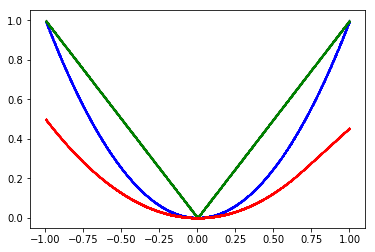

In [9]:
e = genError()
quad_loss, mean_loss, huber_loss = loss_funcs(e)
plot_loss([quad_loss, mean_loss, huber_loss])

#### Get Data

In [10]:
X_i, Y, theta0, theta1, gd = init()

#### Deriving the slope and intercept using Analytical Solution

In [11]:
n_theta0, n_theta1 = gd.analytical(X_i, Y)
n_theta0, n_theta1

(2.007617265317731, 2.832643898960809)

#### Deriving the slope and intercept using Gradiant Descent

(2.009483034321938, 2.8335738589218167)

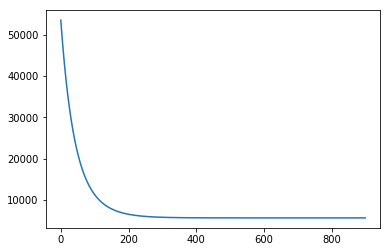

In [12]:
n_theta0, n_theta1, n_error = gd.gd_quad(theta0, theta1, X_i, Y, num_steps=900)
plt.plot(n_error)
n_theta0, n_theta1

#### Deriving the slope and intercept using SGD/Batch Gradiant Descent

(2.033404714125088, 2.8457135940605434)

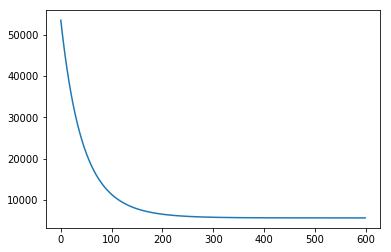

In [13]:
n_theta0, n_theta1, n_error = gd.sgd_quad(theta0, theta1, X_i, Y)
plt.plot(n_error)
n_theta0, n_theta1

#### Slope Histogram of Analytical Solution

The mean of the slope is  2.9932462355529132


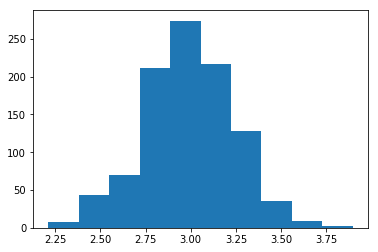

In [14]:
gen_hist(1000, 'ana')

#### Slope Histogram of Gradient Descent

The mean of the slope is  2.9913128601757526


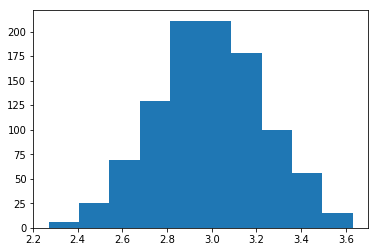

In [15]:
gen_hist(1000, 'gd')

#### Slope Histogram of SGD / Batch Gradient Descent

The mean of the slope is  3.012045117117278


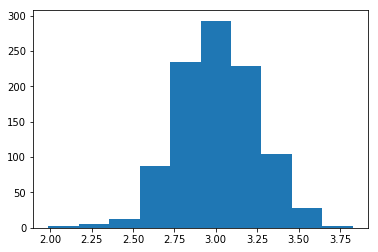

In [16]:
gen_hist(1000, 'sgd')

__The choice of the algorithm doesn't necessarily impact the slope of the regression. However it can be observed that the slope is more skewed to the left of the mean when we use Sochastic Gradient descent method__

#### Deriving the slope and intercept using Analytical Solution

In [17]:
n_theta0, n_theta1 = gd.analytical(X_i, Y)
n_theta0, n_theta1

(2.007617265317731, 2.832643898960809)

#### Deriving the slope and intercept using Mean Absolute Error with Gradient Descent and Batch/SGD Gradient Descent

(2.806400000000111, 3.412397238811685)

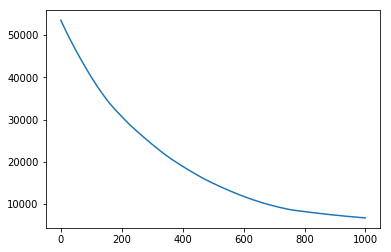

In [18]:
n_theta0, n_theta1, n_error = gd.gd_mae(theta0, theta1, X_i, Y)
plt.plot(n_error)
n_theta0, n_theta1

(2.8075999999980215, 3.4139421706677893)

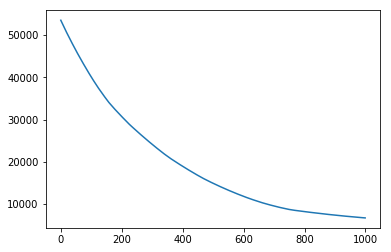

In [19]:
n_theta0, n_theta1, n_error = gd.sgd_mae(theta0, theta1, X_i, Y)
plt.plot(n_error)
n_theta0, n_theta1

#### Deriving the slope and intercept using Huber loss Error with Gradient Descent and Batch/SGD Gradient Descent

(2.183551920957802, 3.01762426190949)

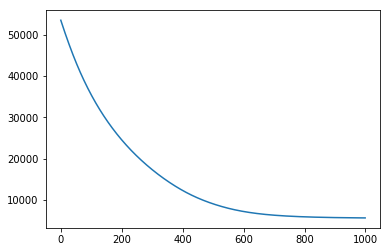

In [20]:
n_theta0, n_theta1, n_error = gd.gd_hubber(theta0, theta1, X_i, Y, delta=1.5)
plt.plot(n_error)
n_theta0, n_theta1

(2.1843531576153574, 3.0176560531090852)

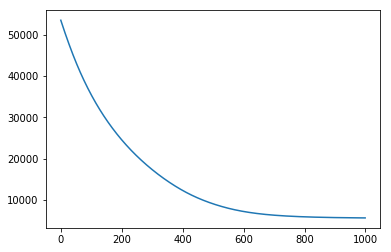

In [21]:
n_theta0, n_theta1, n_error = gd.sgd_hubber(theta0, theta1, X_i, Y, delta=1.5, num_steps=1000)
plt.plot(n_error)
n_theta0, n_theta1

#### Slope Histogram of Analytical Solution

The mean of the slope is  2.9977711816423827


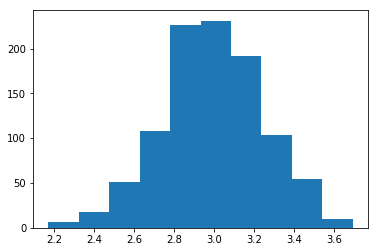

In [22]:
gen_hist(1000, 'ana')

#### Slope Histogram of Mean Absolute Error Gradient Descent

The mean of the slope is  3.076484383002292


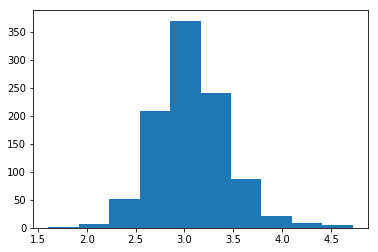

In [23]:
gen_hist(1000, 'mae')

#### Slope Histogram of Huber loss Error Gradient Descent

The mean of the slope is  2.99709855069513


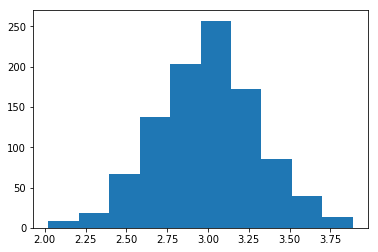

In [24]:
gen_hist(1000, 'hubber', delta=1.5)

__Using Mean absolute error the varience of the slope is less compared to the other techniques however the distribution is normal along the mean for all techniques__

#### Inducing Noise in the Dataset

In [25]:
XNoise_i, YNoise, theta0, theta1, gd = insertNoise(0.1)

#### Analytical Solution with Noisy Data

In [26]:
n_theta0, n_theta1 = gd.analytical(XNoise_i, YNoise)
n_theta0, n_theta1

(1.6992520160015223, 3.196871085342846)

#### Gradient descent using Mean Absolute Error with Noisy Data

(1.8028000000000617, 3.041611985046415)

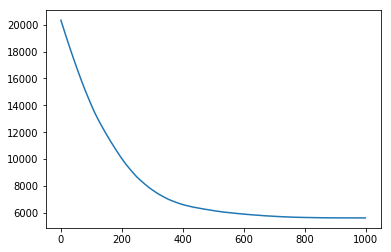

In [27]:
n_theta0, n_theta1, n_error = gd.gd_mae(theta0, theta1, XNoise_i, YNoise)
plt.plot(n_error)
n_theta0, n_theta1

#### Gradient descent using Hubber Loss Error with Noisy Data

(1.755346721975106, 3.0557651812633204)

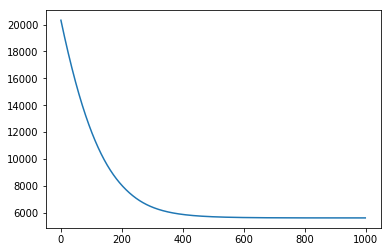

In [28]:
n_theta0, n_theta1, n_error = gd.gd_hubber(theta0, theta1, XNoise_i, YNoise, delta=1.5)
plt.plot(n_error)
n_theta0, n_theta1

#### Slope Histogram of Noise Data using Analytical Solution

The mean of the slope is  3.0054071390070796


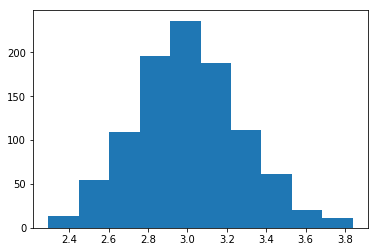

In [29]:
gen_hist(1000, 'ana', error=1, tprob=0.1)

#### Slope Histogram of Noise Data using Mean Absolute Error

The mean of the slope is  3.076144269439512


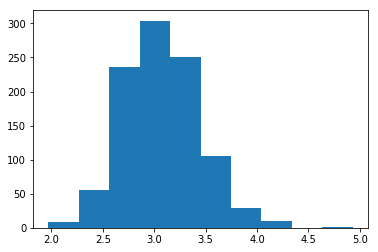

In [30]:
gen_hist(1000, 'mae', error=1, tprob=0.1)

#### Slope Histogram of Noise Data using Hubber Loss

The mean of the slope is  2.974204408785957


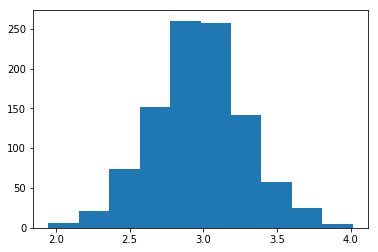

In [31]:
gen_hist(1000, 'hubber', delta=1.5, error=1, tprob=0.1)

__One can notice that using Mean absolute error function skews more to right of the mean compared to the other two techniques, hubber loss produces around 50% slope within one standard deviation__